In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

Y = np.array([
    [0],
    [1],
    [1],
    [0]
])

class MLP:
    def __init__(self, eta=0.01, epoch=10000):
        self.eta =eta
        self.epoch = epoch
        self.wi = np.array([[1.0, 2.0],
                            [1.0, 2.0],
                            [-2.0, -1.0]])
        self.wo = np.array([2.0, -1.0, 2.0])
        self.error_square = np.array([])
        # self.error = []

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    def fit(self, X, Y):
        X = np.insert(X,0,1,axis=1)
        for i in range(self.epoch):
            sub_error = np.array([])
            for x,y in zip(X,Y):
                        #Feed Forward
                u = x @ self.wi
                H = np.hstack([1, self.sigmoid(u)])
                Y_hat = self.sigmoid(H @ self.wo)
                        #Back Propagation
                e = y-Y_hat
                delta_o = e * Y_hat * (1 - Y_hat)
                self.wo += self.eta * delta_o * H
                
                delta_h = np.outer(x, delta_o * (self.wo[1:]) * (H*(1-H))[1:])
                self.wi += self.eta * delta_h
    
                sub_error = np.append(sub_error,e**2)
            self.error_square = np.append(self.error_square, sub_error.mean())
            if len(self.error_square) > 2 and self.error_square[-1] > self.error_square[-2]:
                print('round :', i)
                break

            
    def predict(self, X):
        predictions = []
        X = np.insert(X,0,1,axis=1)
        for x in X:
            H = np.hstack([1, self.sigmoid(x @ self.wi)])
            Y_hat = self.sigmoid(H @ self.wo)
            predictions.append(Y_hat)
        return predictions
    
    def predict(self, X):
        predictions = []
        X = np.insert(X,0,1,axis=1)
        H = self.sigmoid(X@self.wi)
        H = np.insert(H,0,1,axis=1)
        Y_hat = self.sigmoid(H @ self.wo)
        return Y_hat





In [3]:
model = MLP(eta=0.001, epoch=10000000)
model.fit(X, Y)

KeyboardInterrupt: 

In [ ]:
model.predict(X)

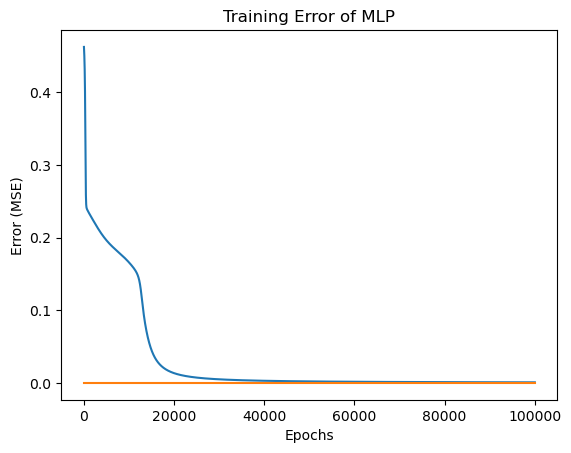

Final predictions:
[0.02859594 0.96792733 0.97262971 0.02535725]
[[ 3.1976504  -2.70180887]
 [ 6.33018346  4.98333523]
 [-6.24075913 -5.18841916]]
[ 3.77593144 -8.17439782  8.78221695]


In [3]:
# Plotting training error over epochs
plt.plot(model.error_square)

plt.plot(np.linspace(0,100001,10), np.zeros(10))
plt.xlabel('Epochs')
plt.ylabel('Error (MSE)')
plt.title('Training Error of MLP')
plt.show()

print("Final predictions:")
print(model.predict(X))

print(model.wi)

print(model.wo)

In [4]:
model.error_square.min()

0.0008096609489183764